<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [3]:
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

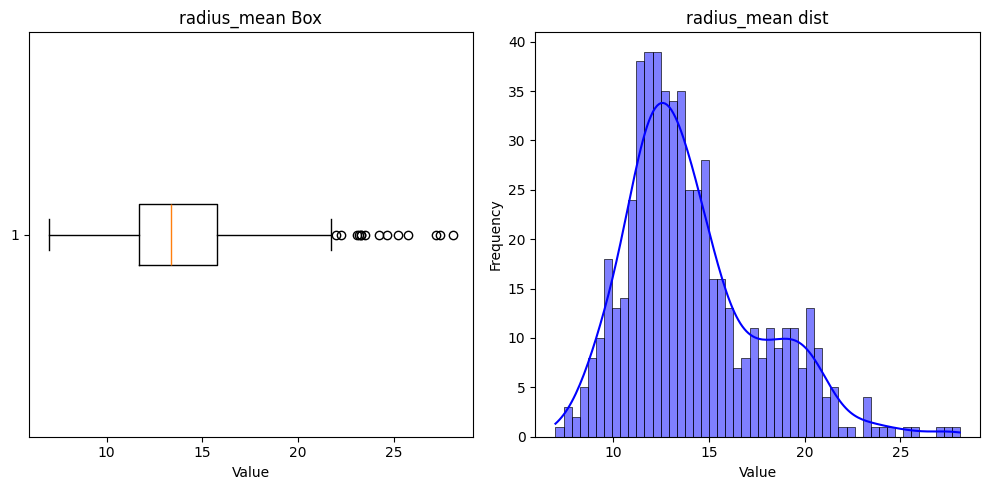

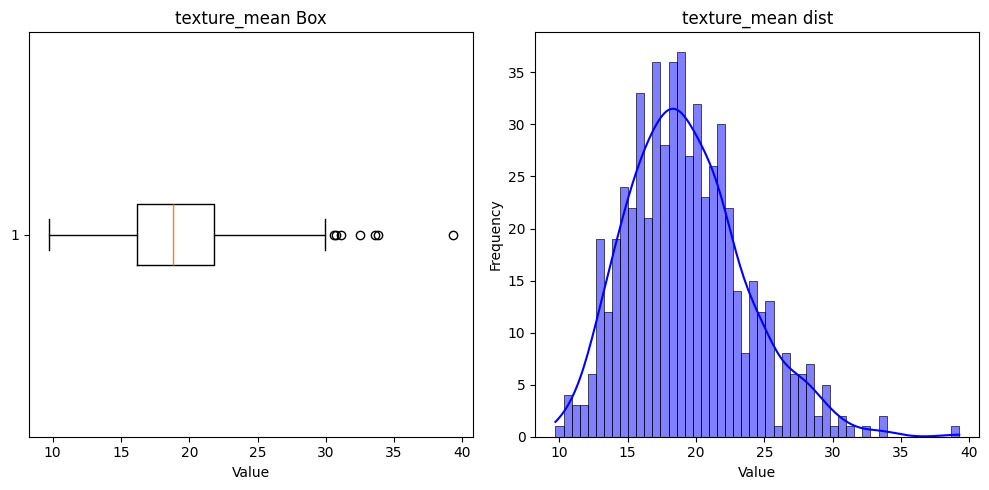

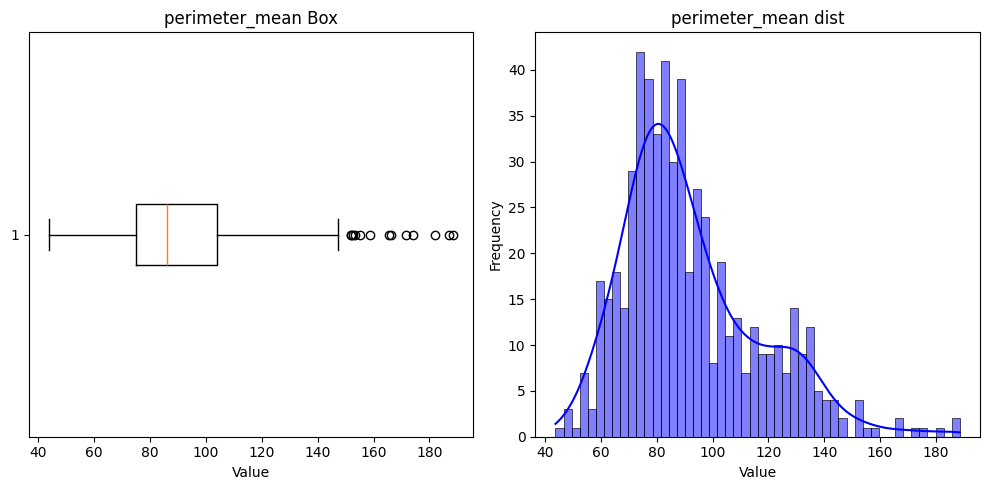

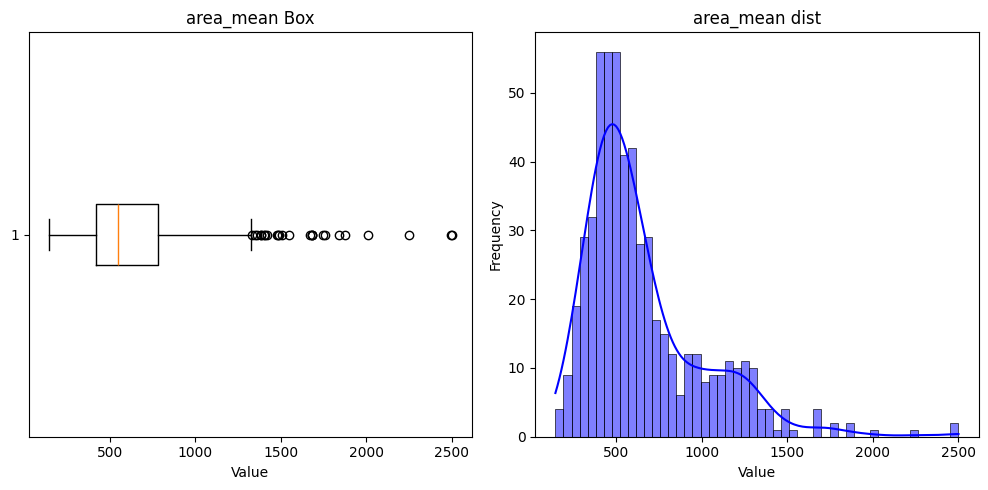

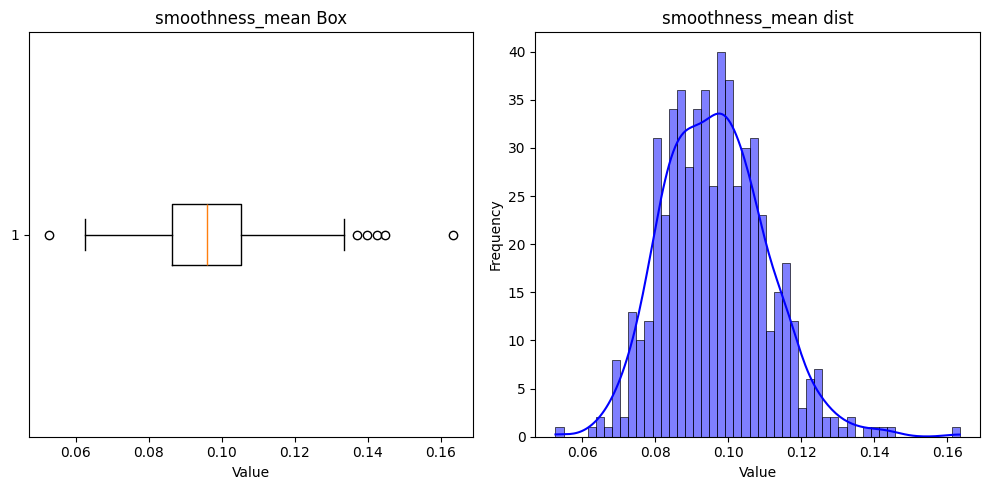

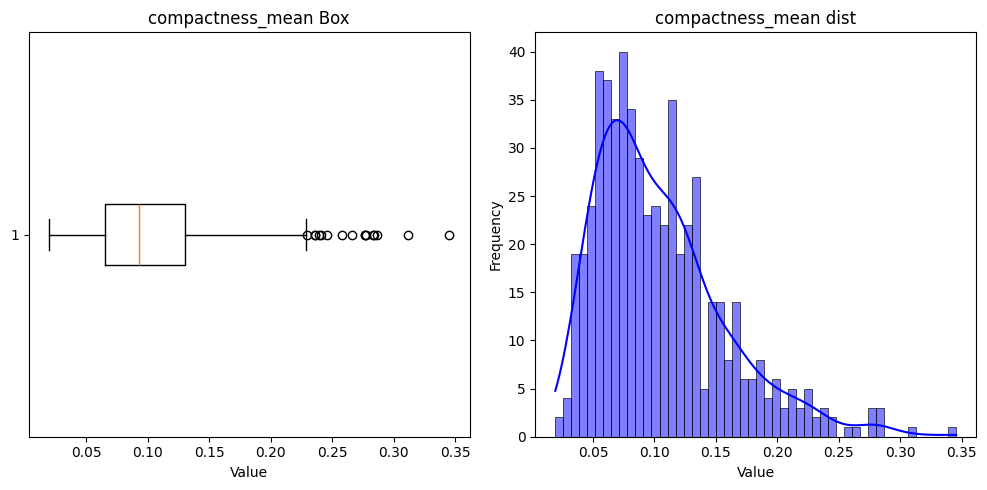

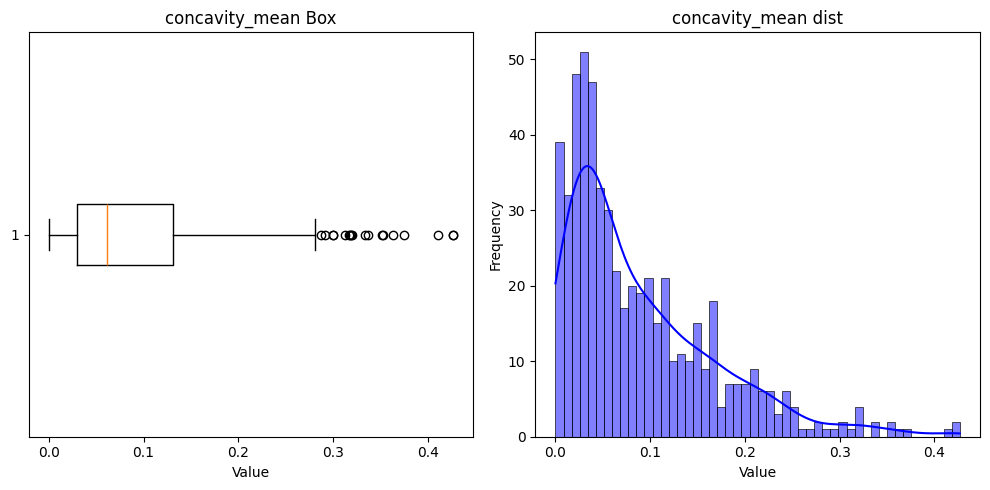

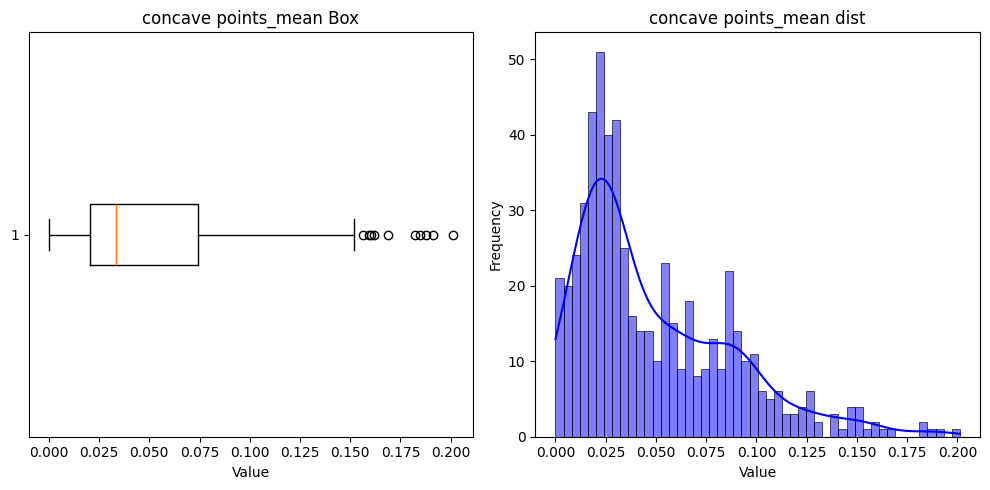

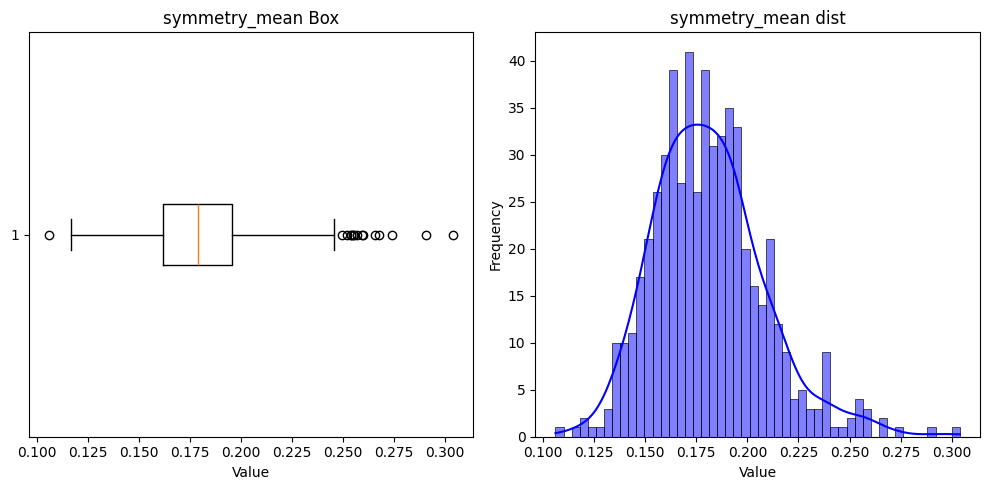

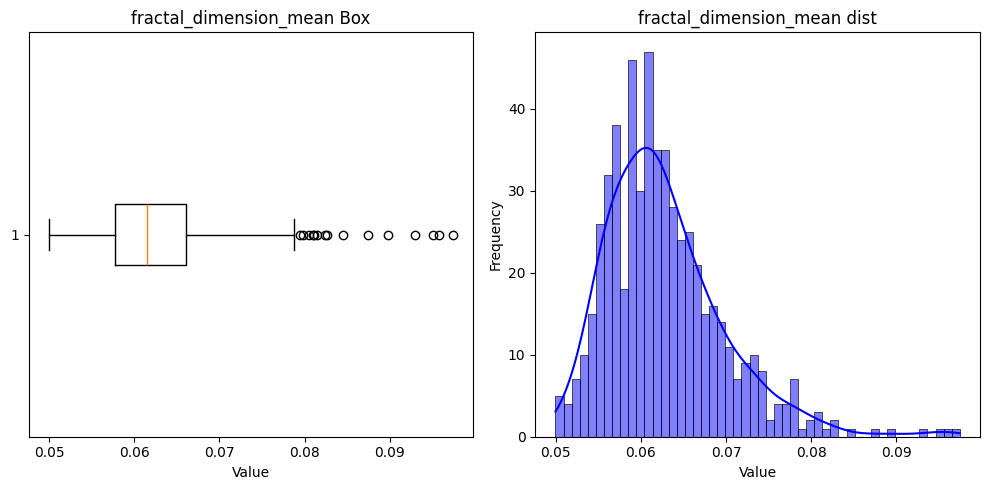

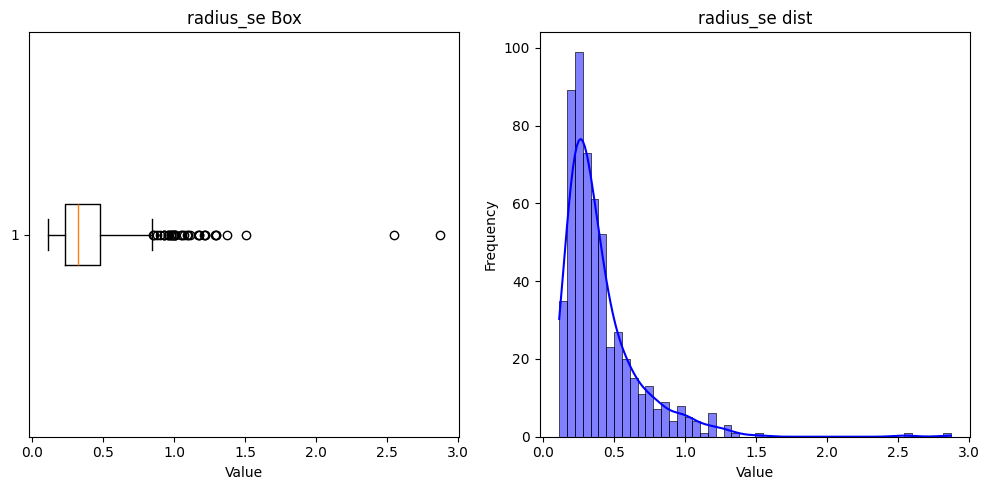

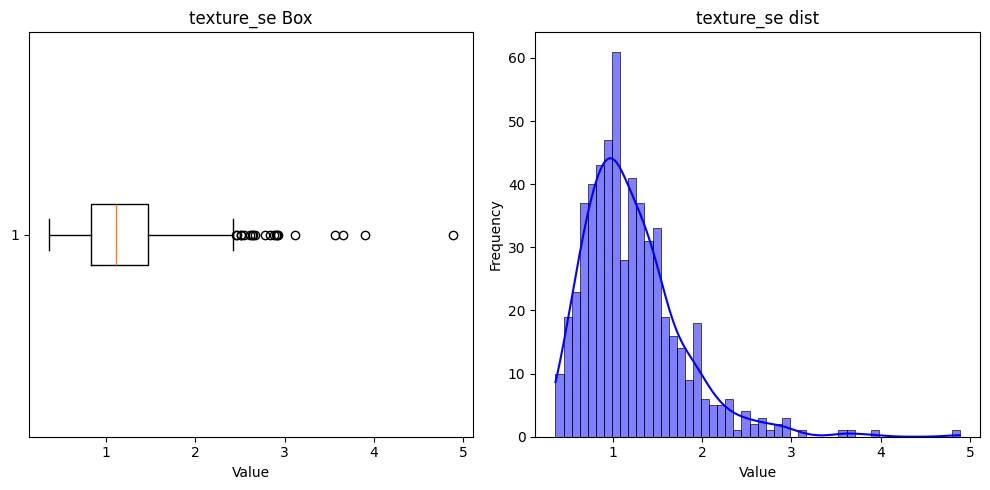

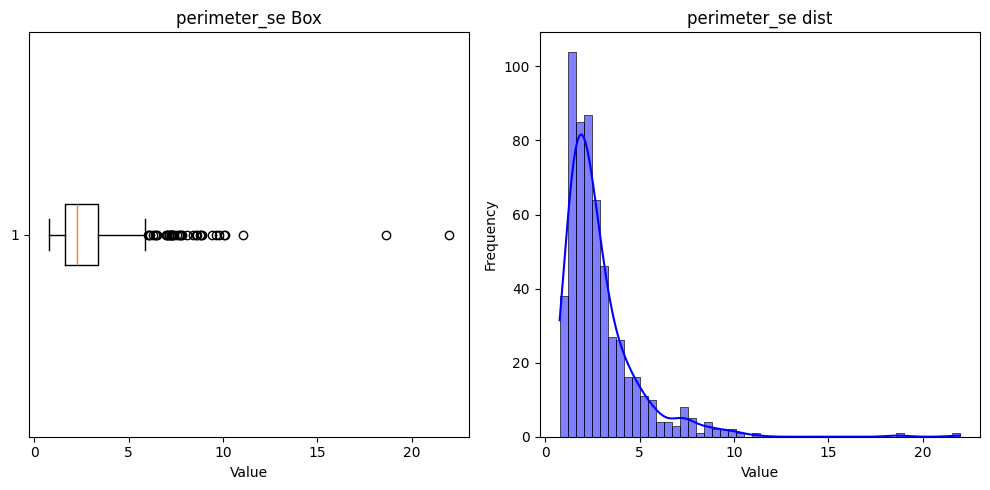

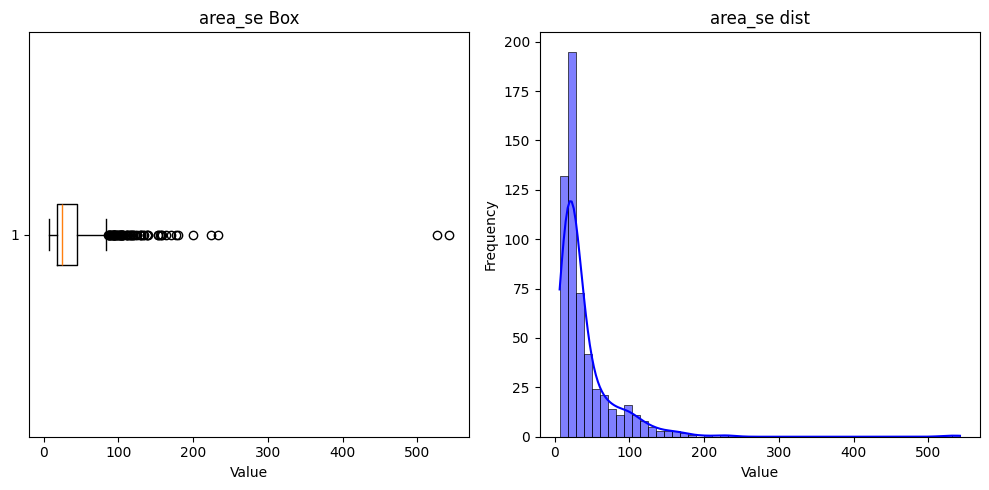

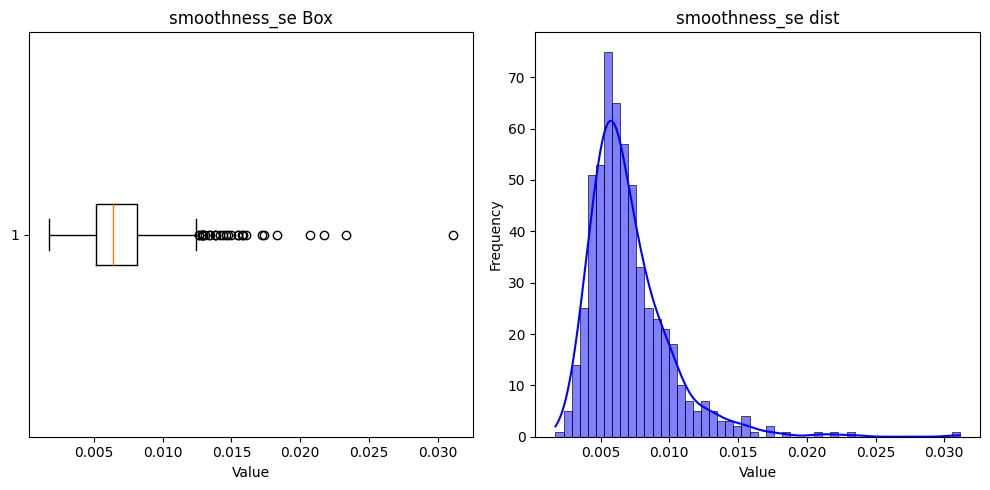

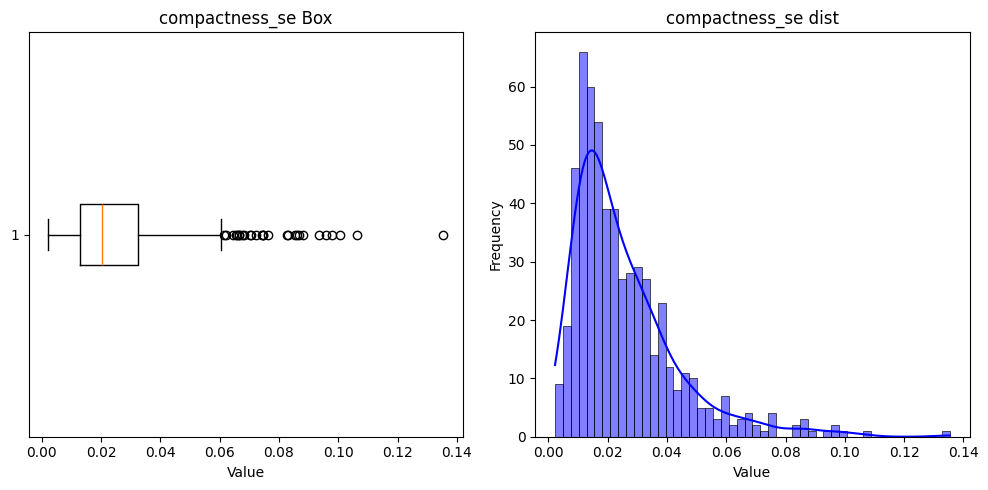

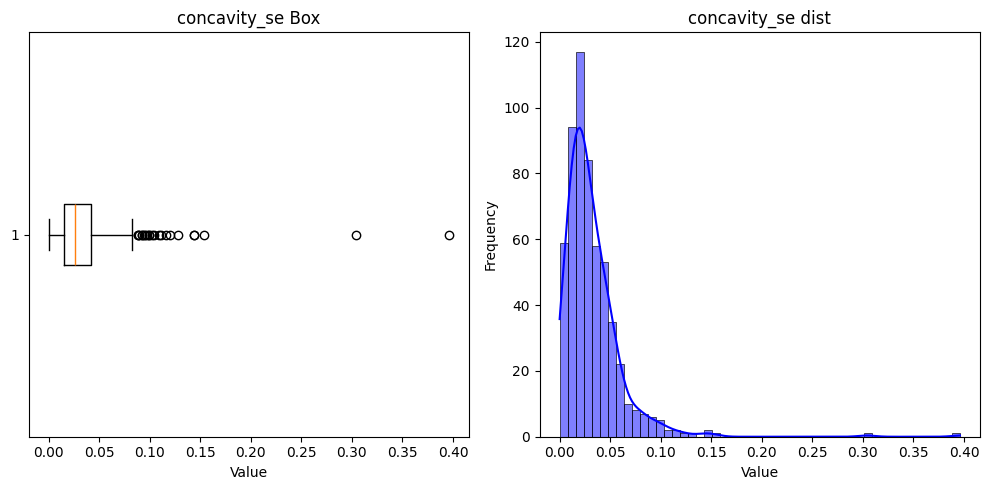

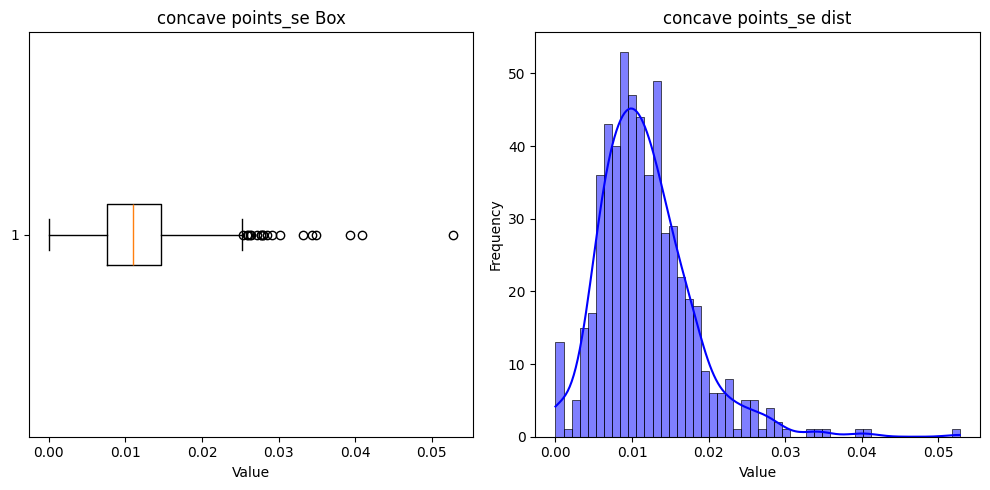

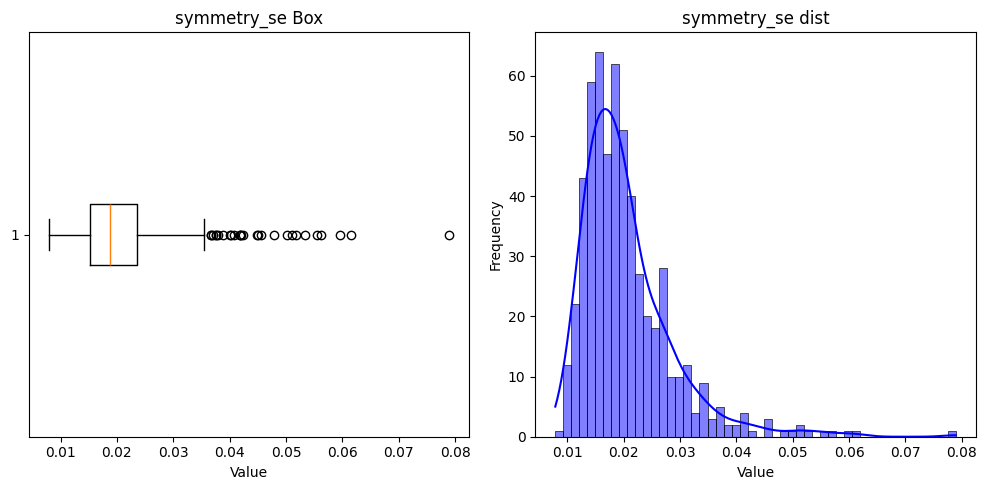

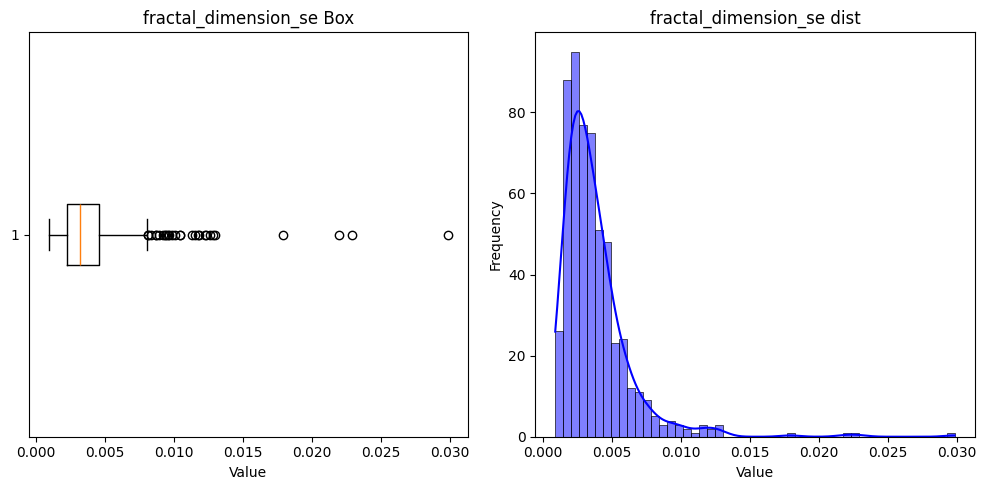

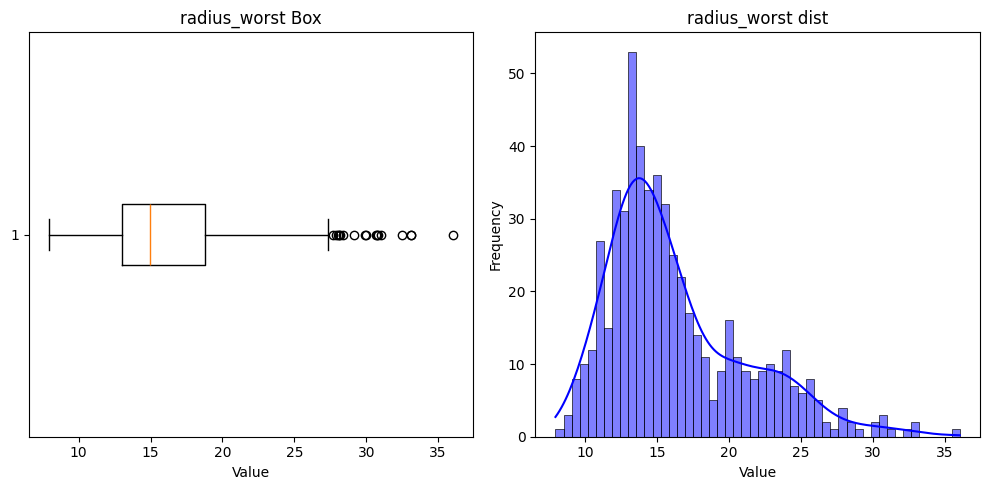

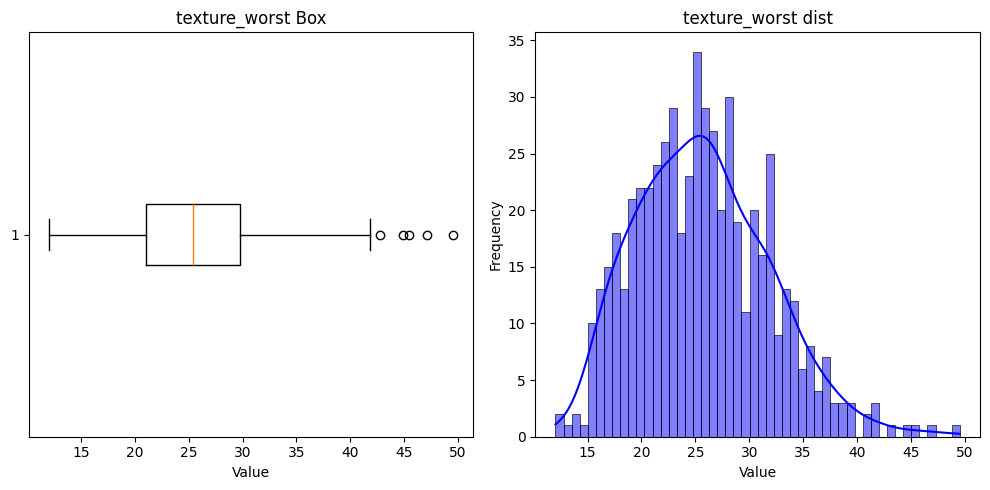

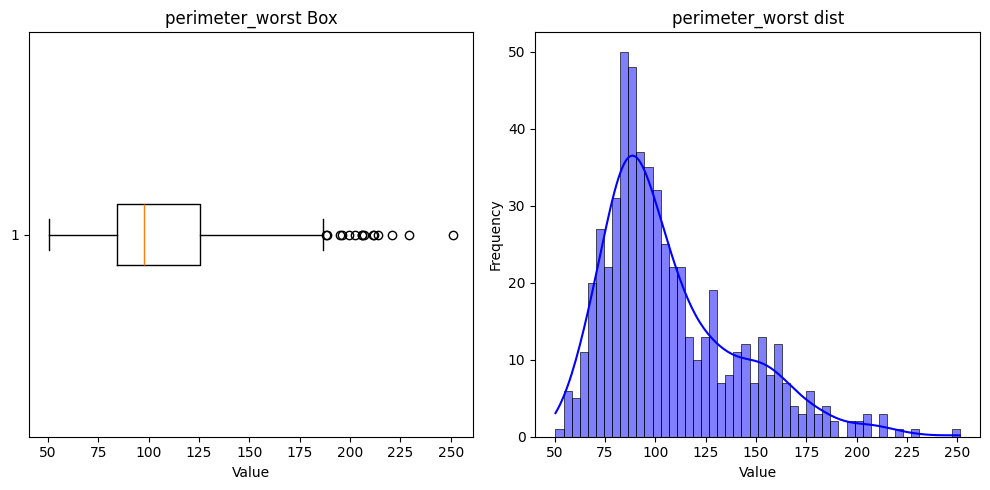

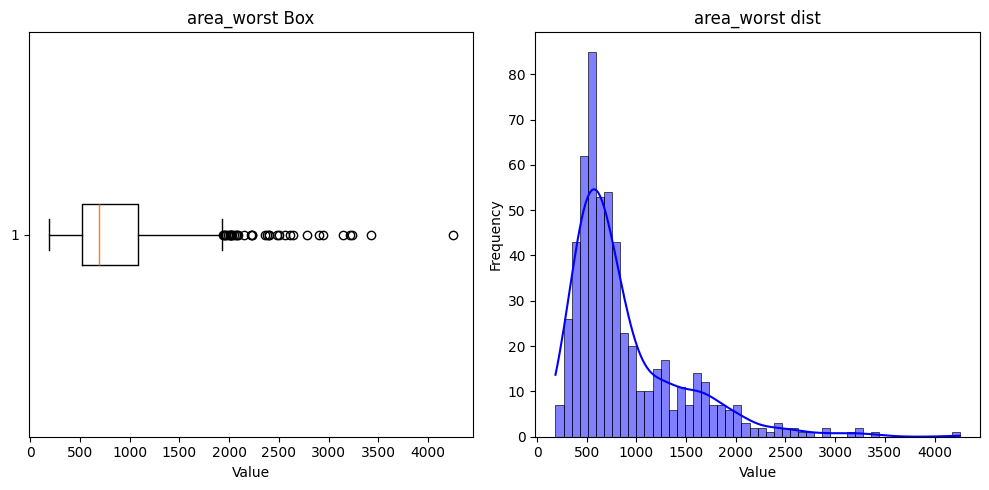

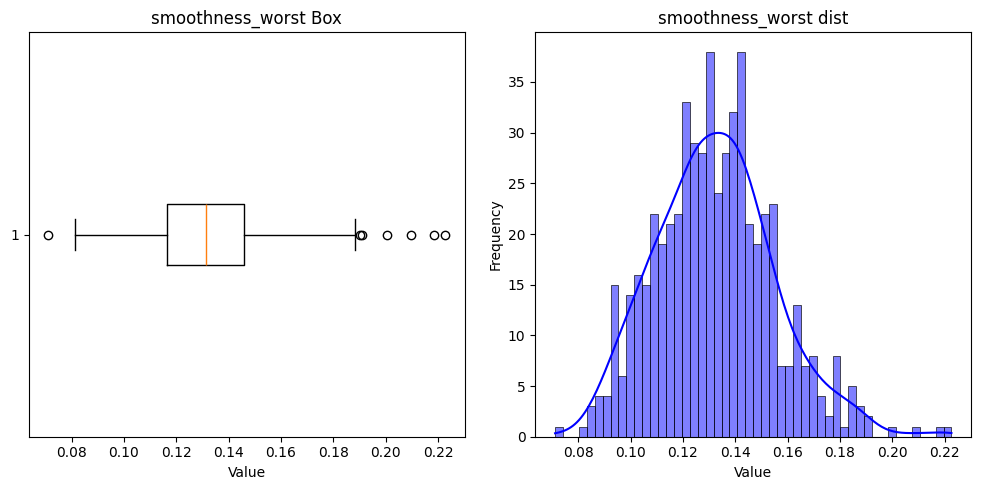

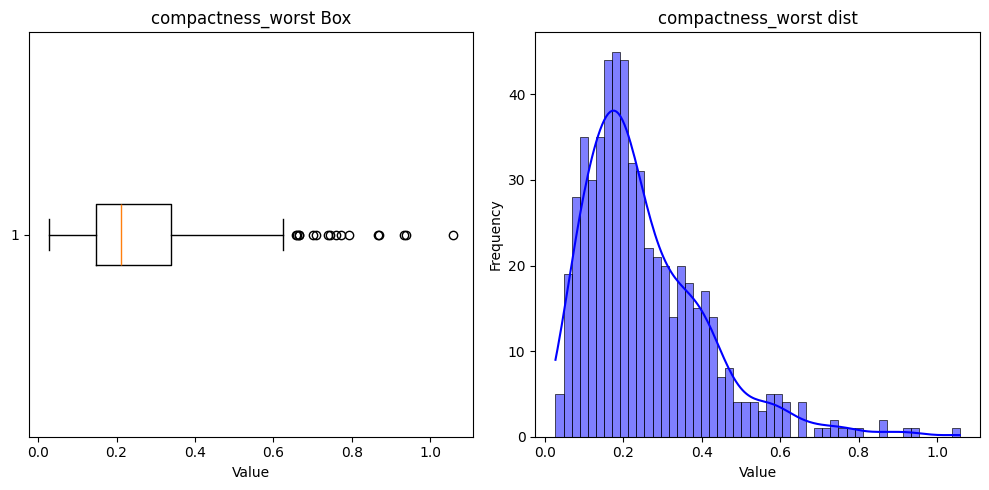

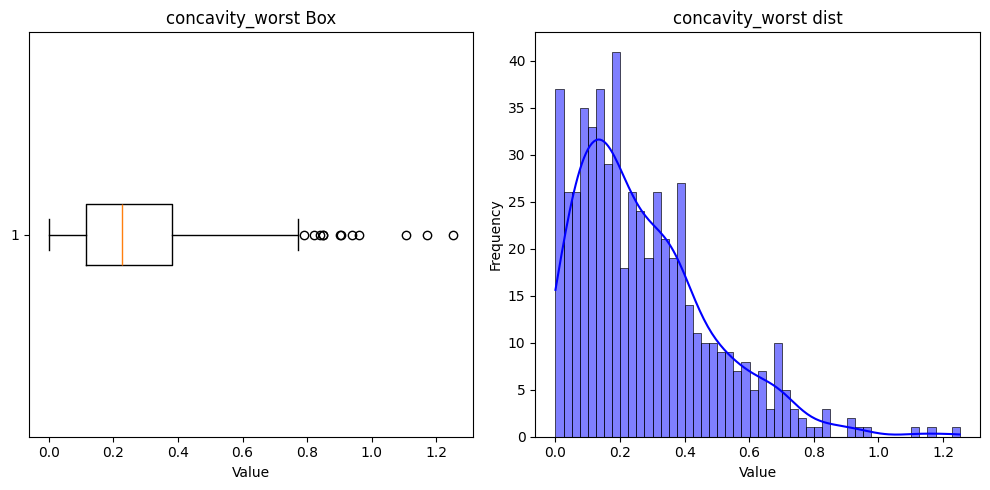

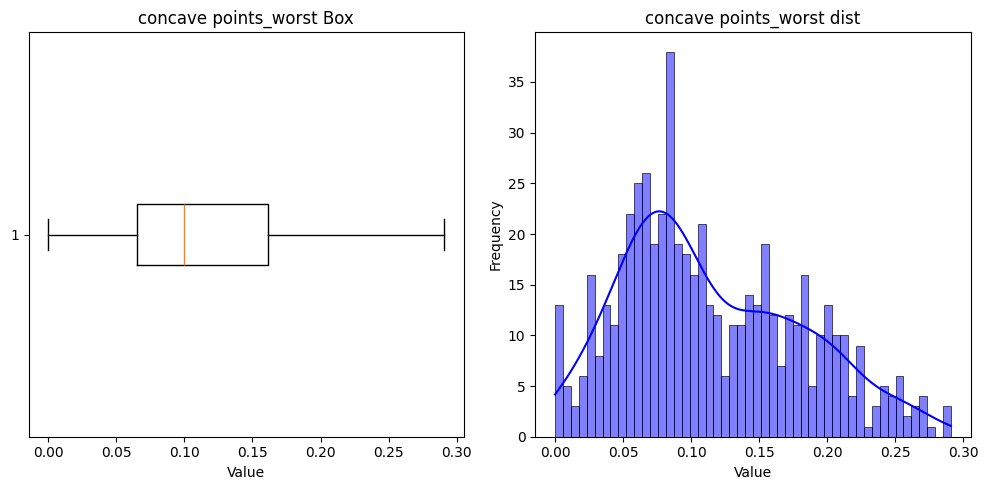

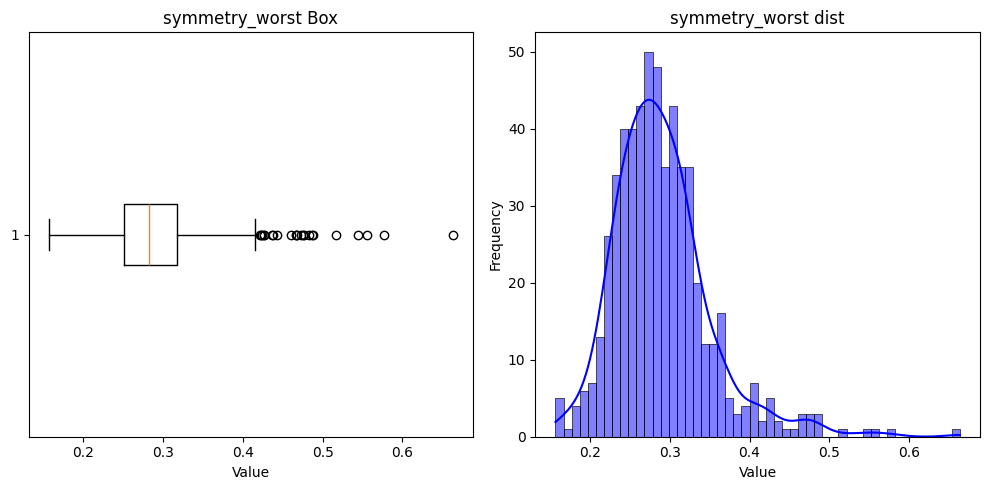

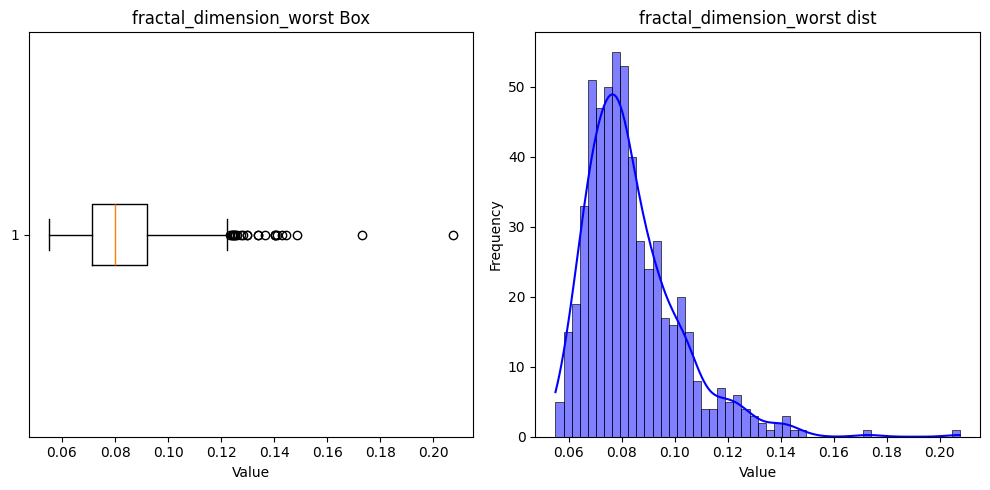

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

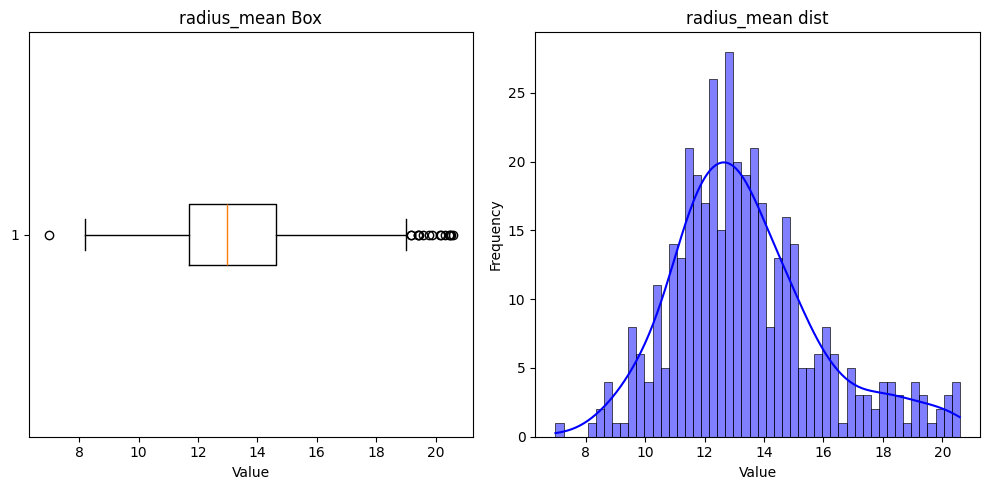

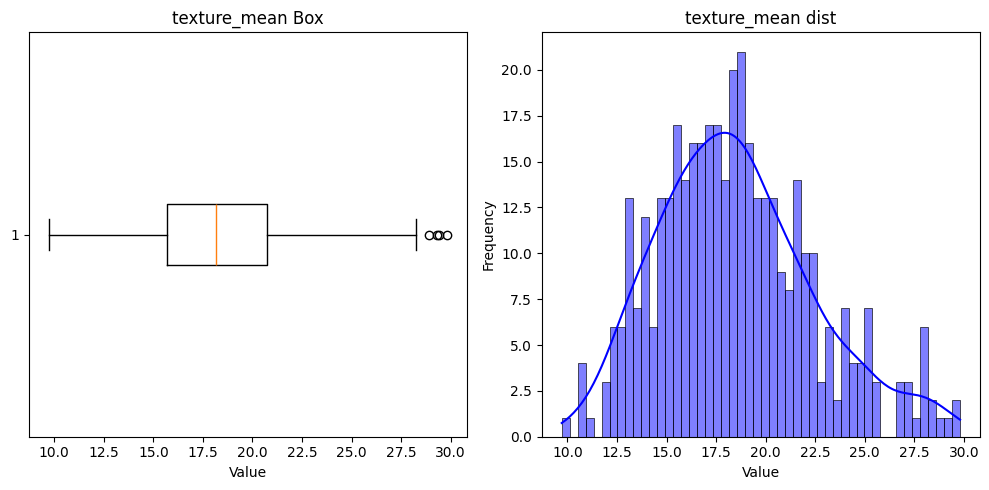

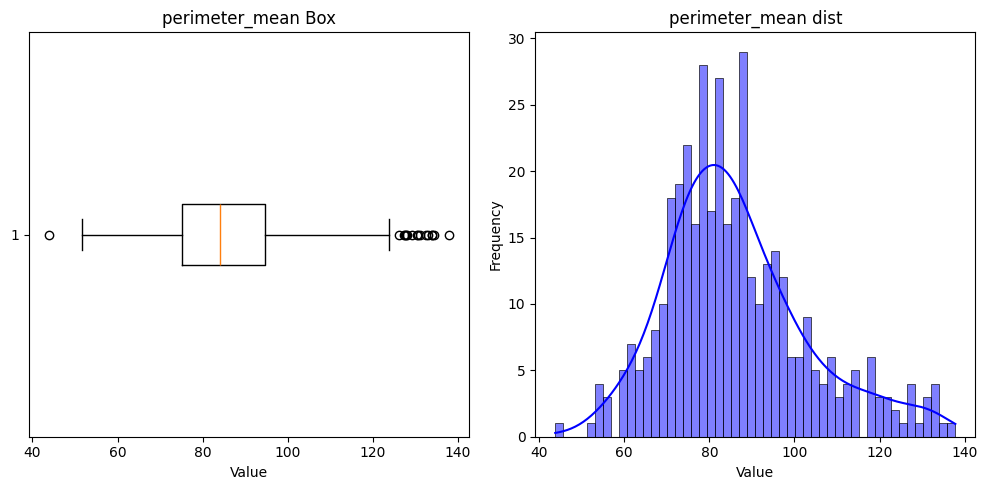

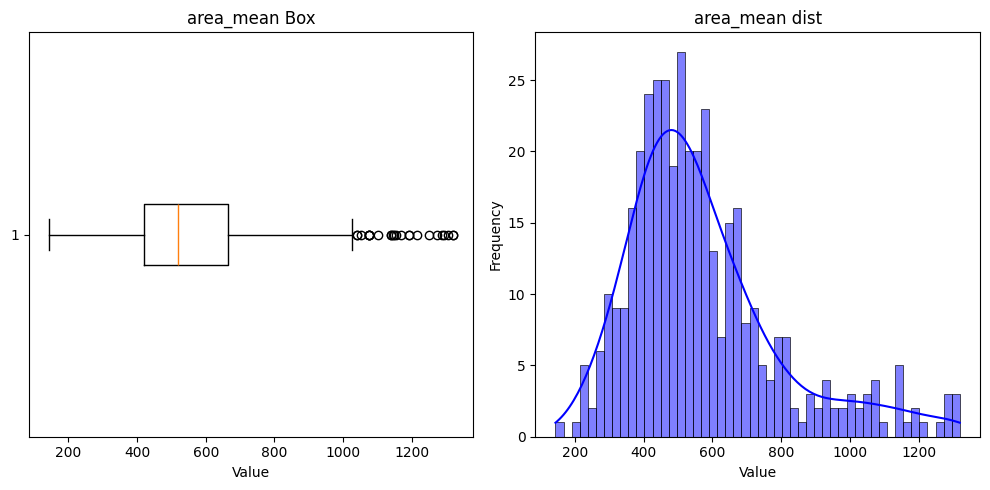

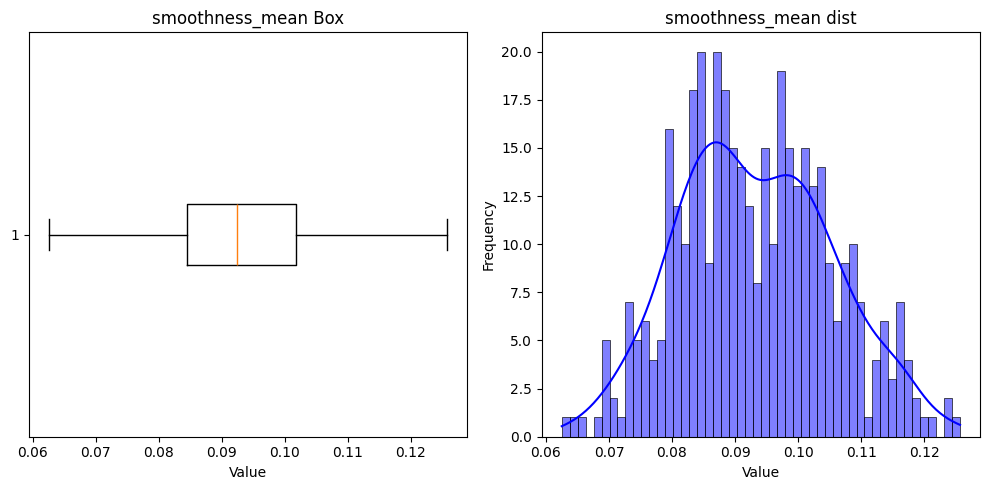

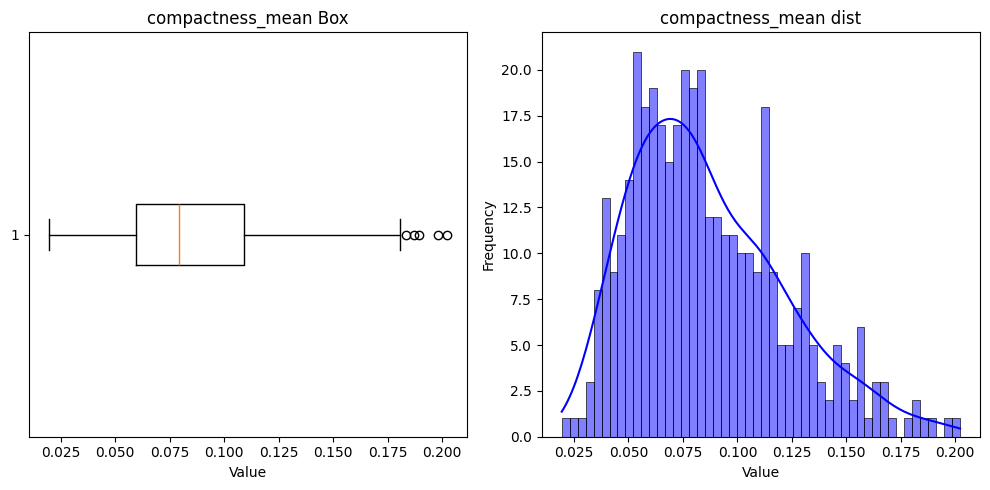

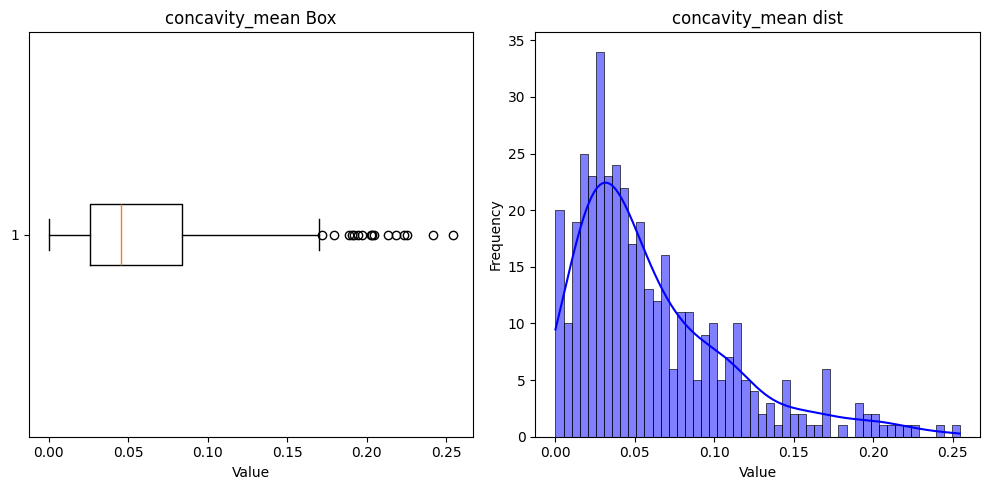

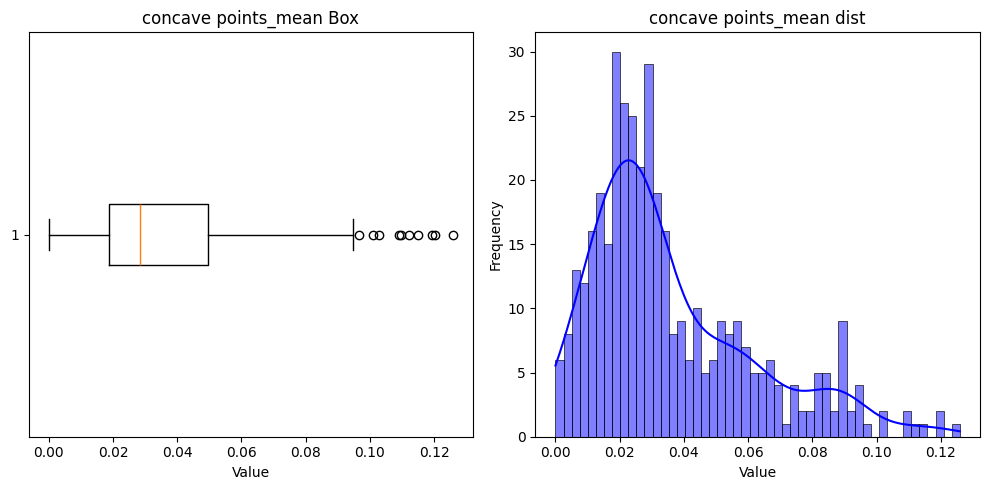

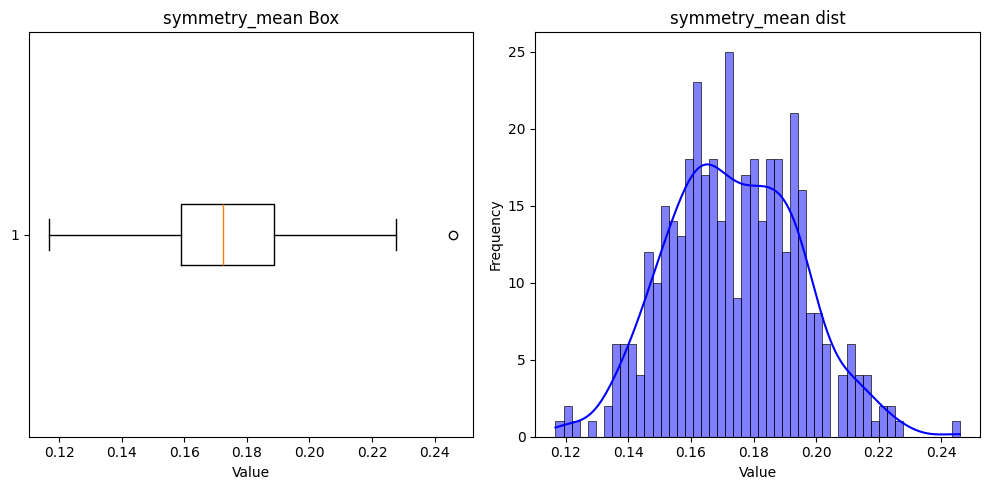

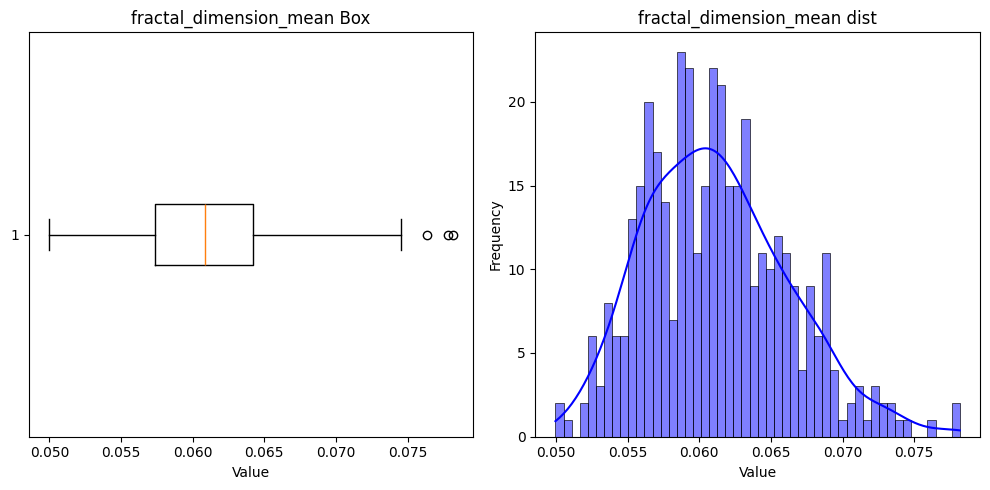

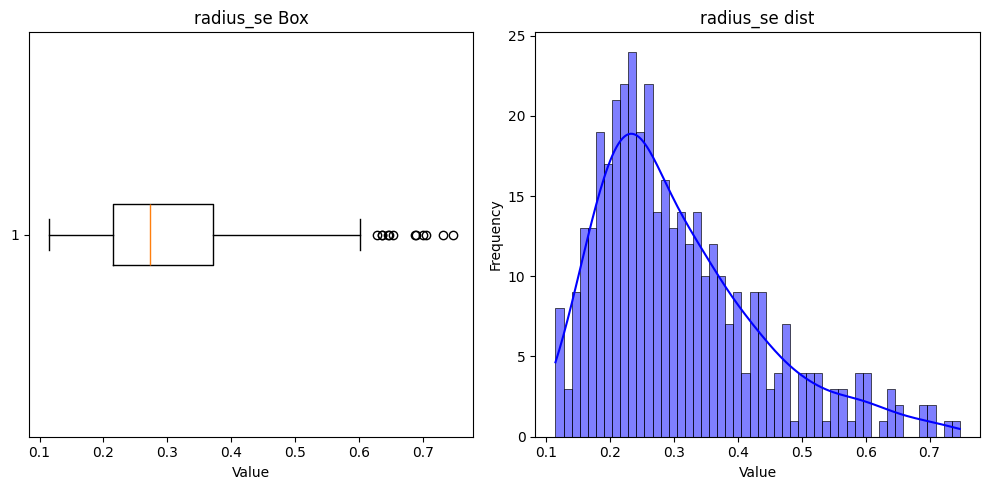

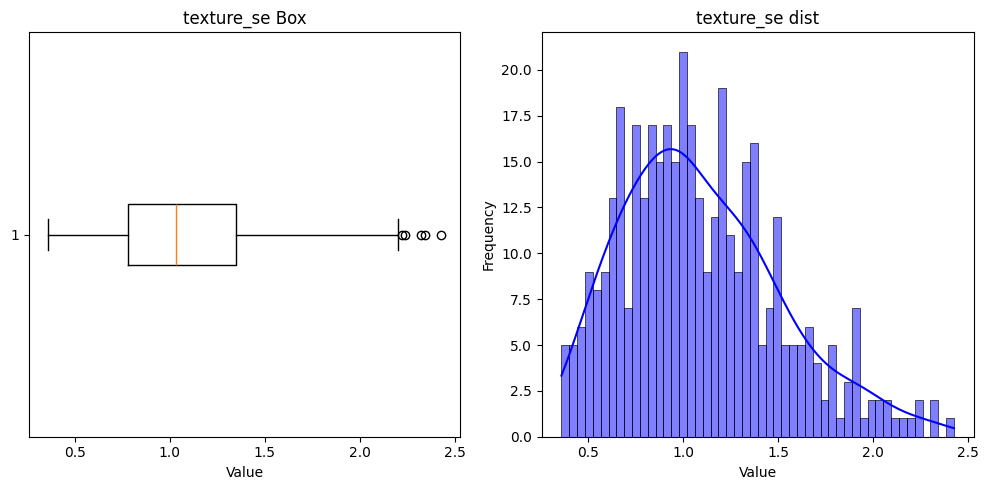

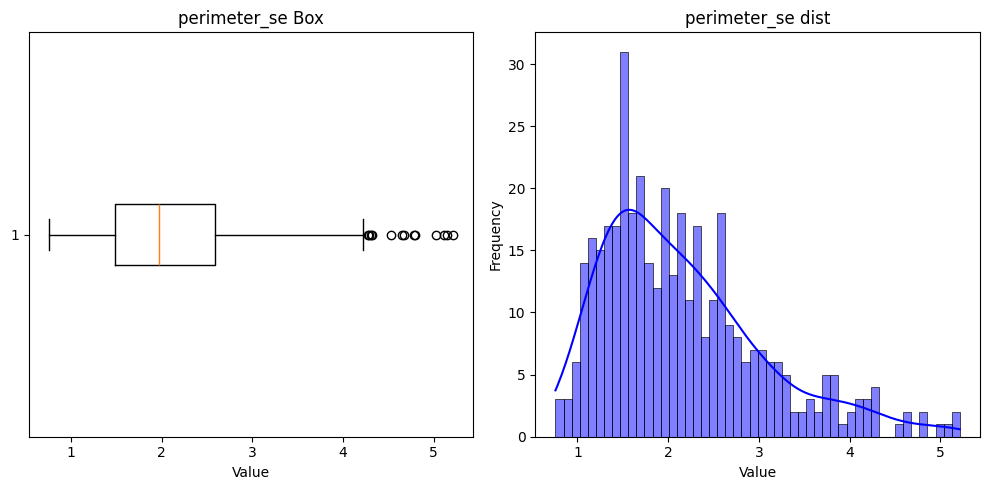

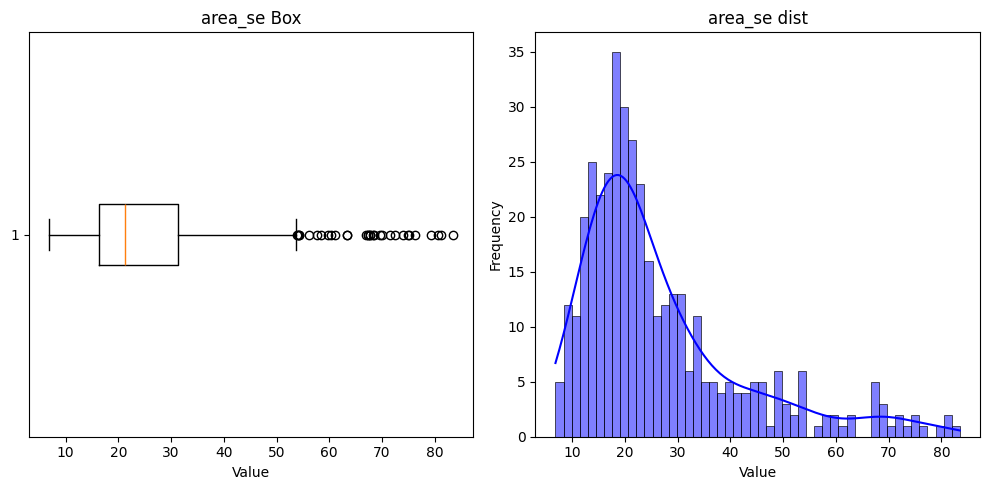

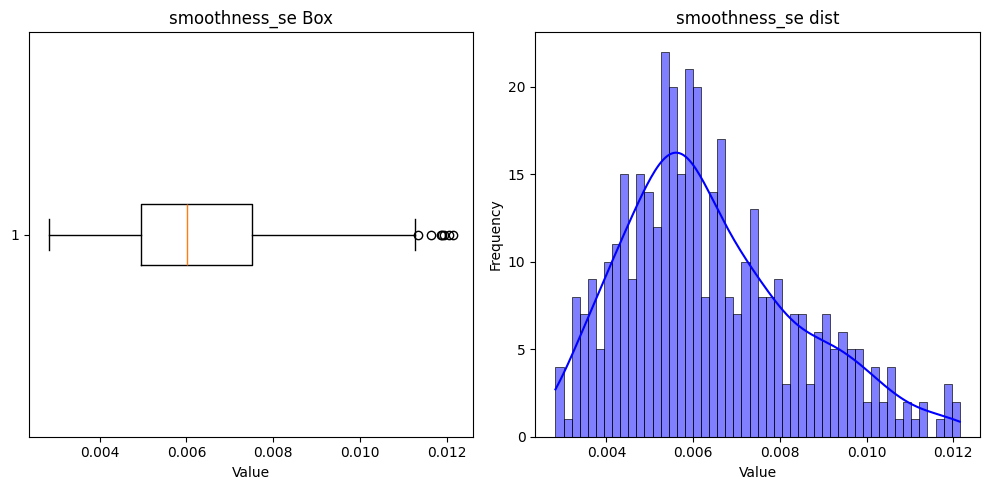

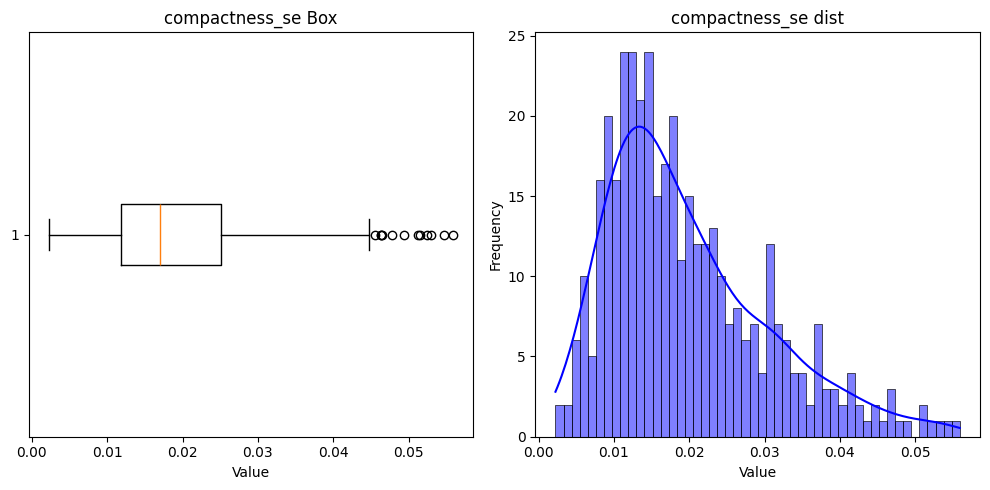

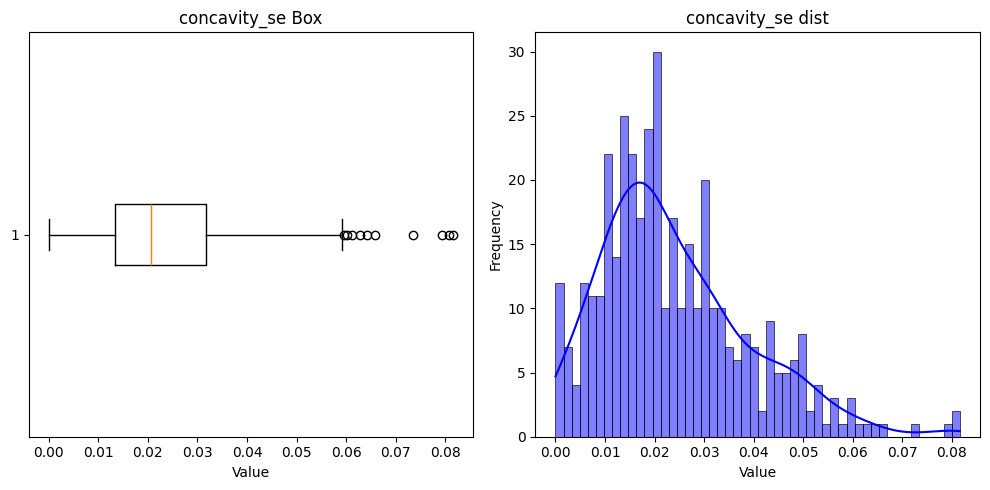

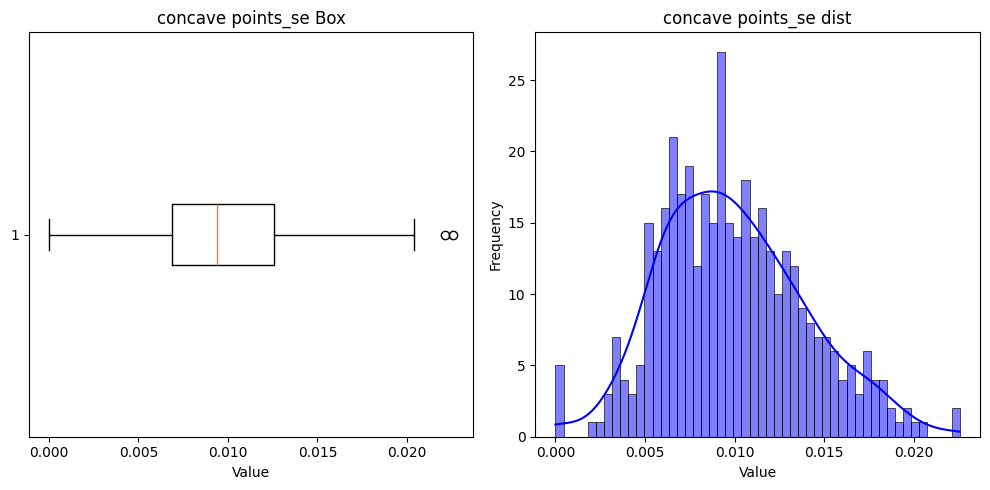

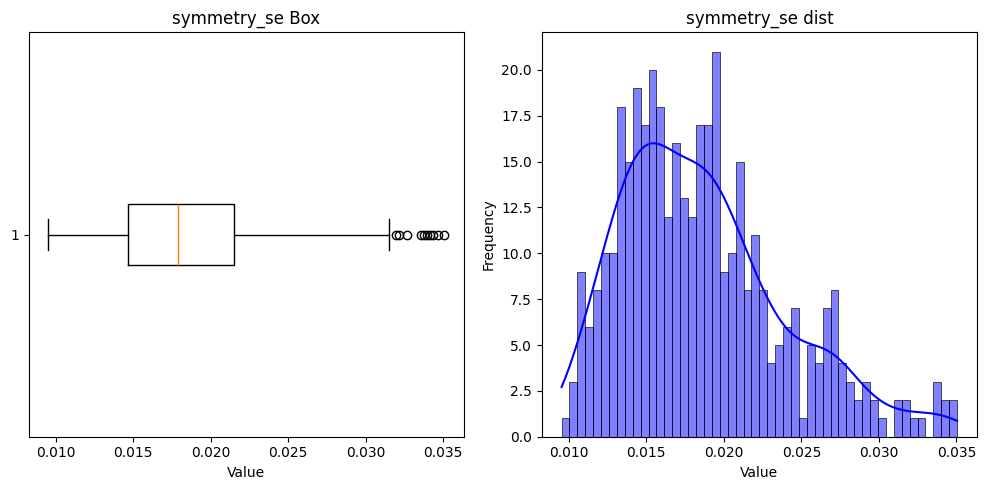

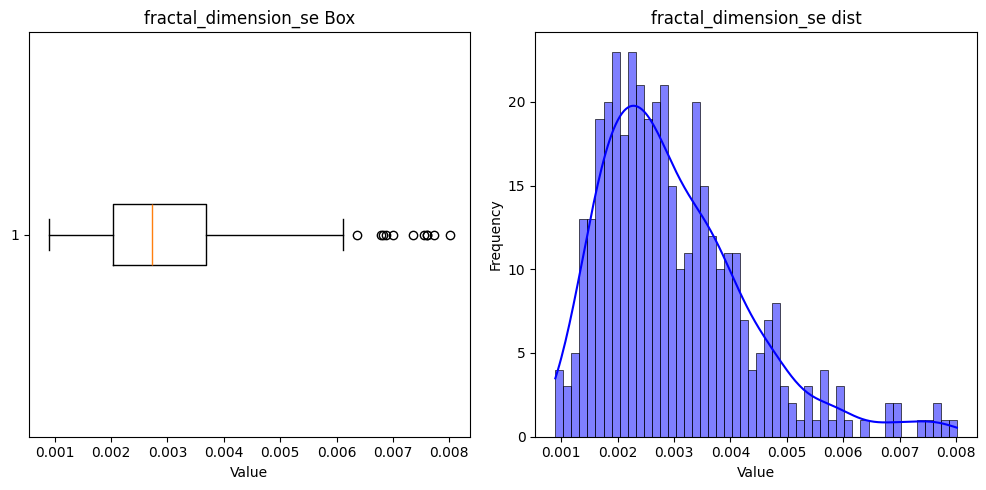

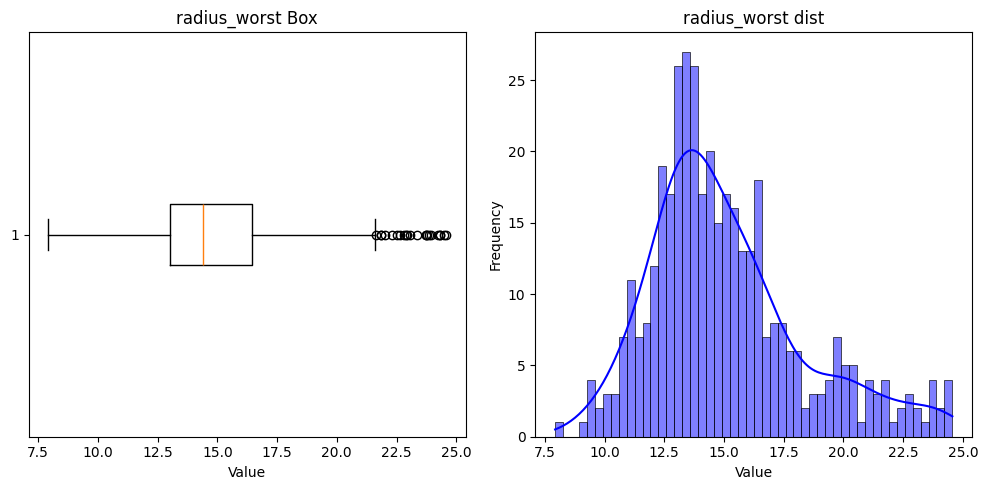

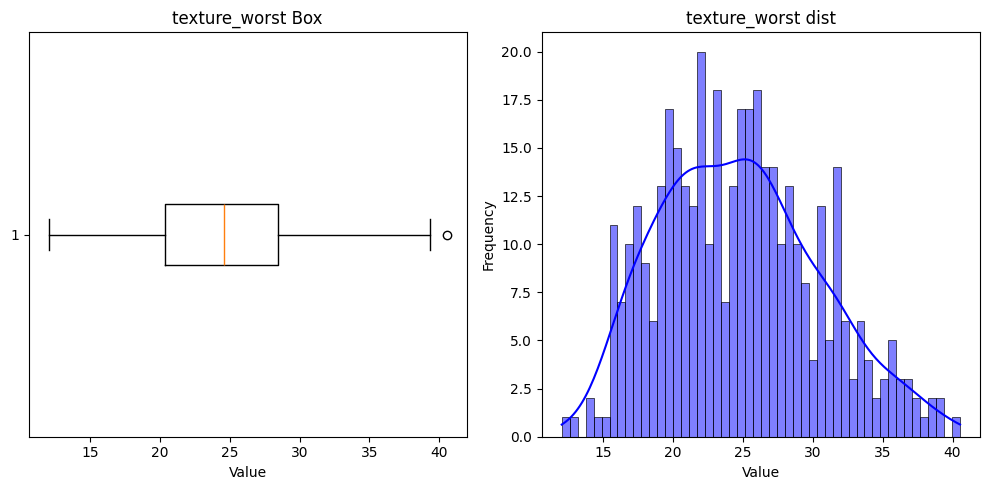

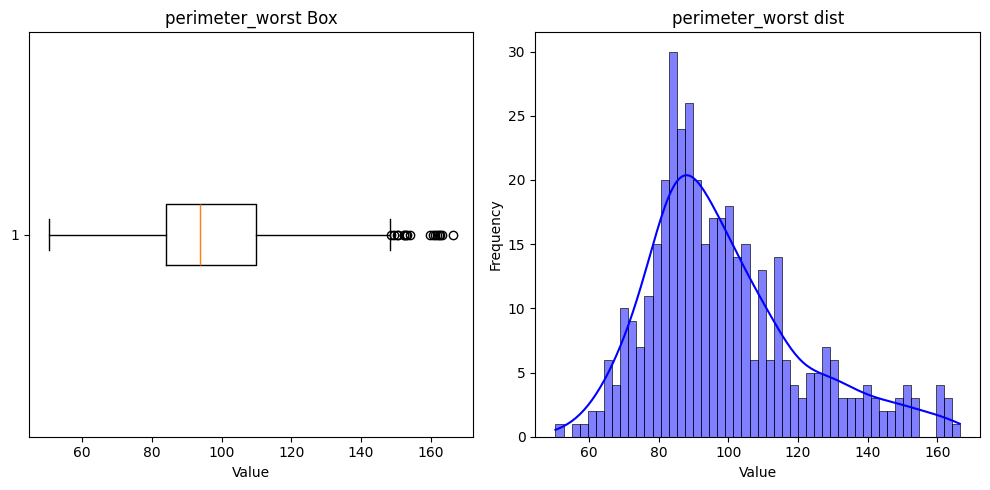

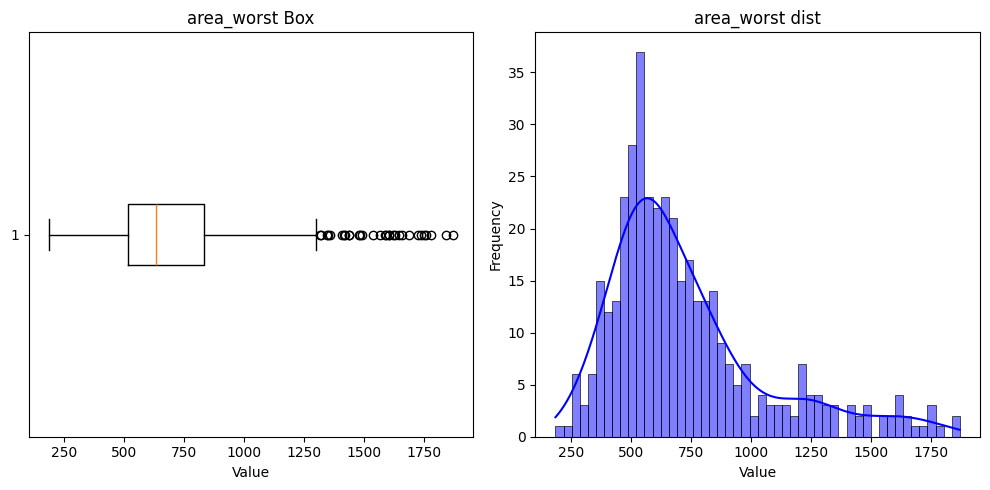

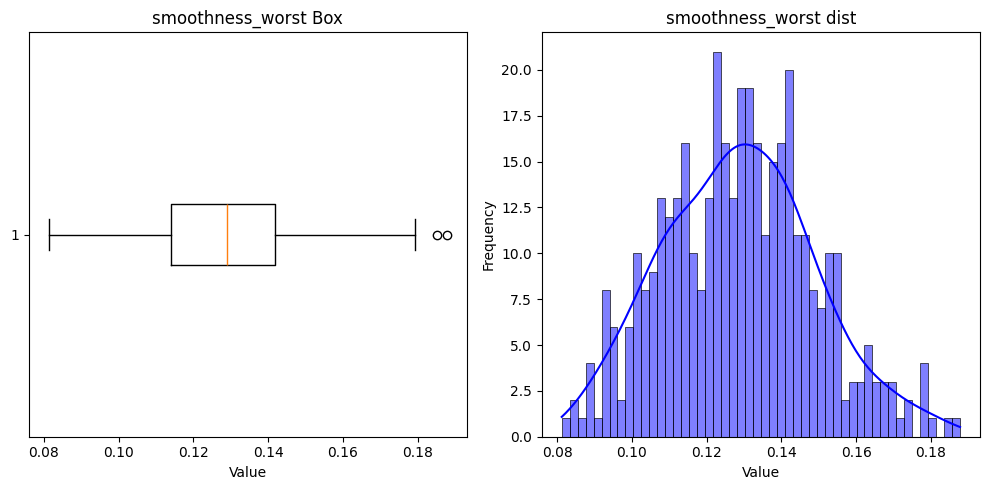

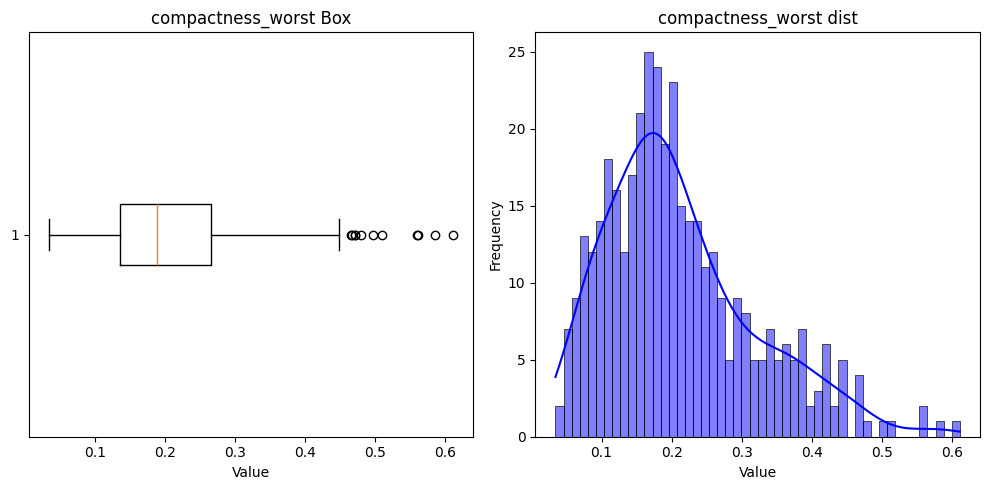

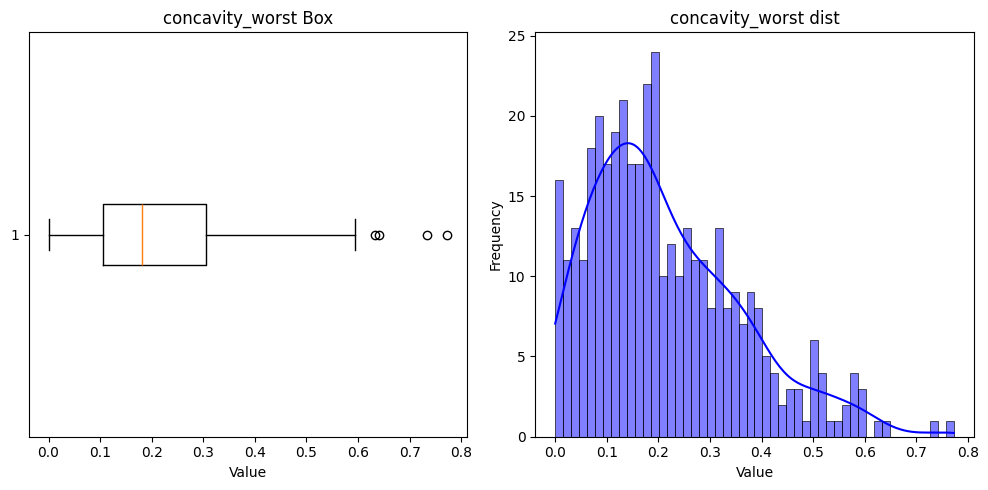

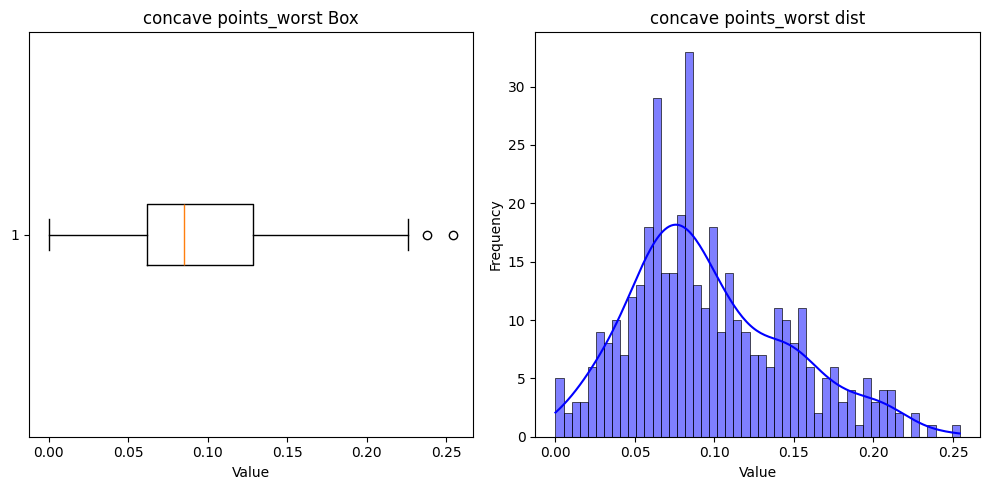

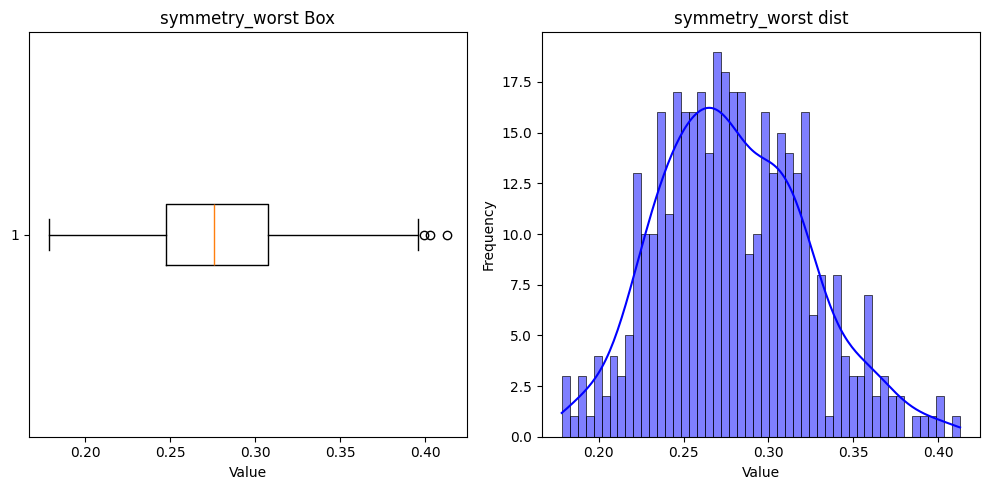

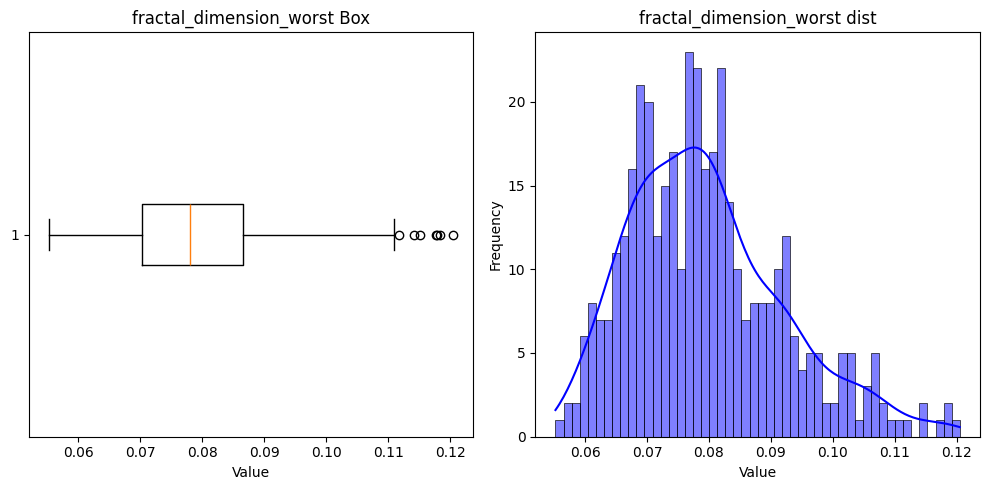

In [5]:
df.info()
df.head()
df.corr
# Count of NaN values in each column
nan_count = df.isna().sum()

print('count of null')
print(nan_count)

print('null anywhere')
df.duplicated().sum()
df.describe()
# Drop unnamed columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

##Check the outliers
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

##From this we can see have outlier and this will affect to the data then i will deal 
# with thia outlier
filter_data=pd.DataFrame()
for column in columns:
    if df[column].dtype=='float64':
        filter_data[column]=df[column]
print(filter_data.info())
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

df.dropna(inplace=True)

## show the outliers after dealing with outliers
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [8]:
# ANSWER

#First split the data to X all data and Y is target
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

### 4. What is the baseline accuracy?



In [9]:
# ANSWER
# Determine the number of unique classes in the target variable
num_classes = y.nunique()
print(f"Number of classes in 'diagnosis': {num_classes}")

# Calculate the baseline accuracy
most_frequent_class = y.mode()[0]
baseline_accuracy = (y == most_frequent_class).mean()
print(f"Baseline accuracy: {baseline_accuracy:.2f}")





Number of classes in 'diagnosis': 2
Baseline accuracy: 0.75


### 5. Choose features to be your predictor variables and set up your X.

In [11]:
# ANSWER
# List of specific features to use as predictor variables
selected_features = ['radius_se', 'texture_se', 'perimeter_se', 'area_se','smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se' , 'symmetry_se' ,'fractal_dimension_se' ]

# Set up X using the selected features
X = df[selected_features]

# Check the first few rows of X to confirm
print(X.head())

# First split the data to X (all data except the target) and y (target)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Check the first few rows of X to confirm
print(X.head())

    radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
6      0.4467      0.7732         3.180    53.91       0.004314   
7      0.5835      1.3770         3.856    50.96       0.008805   
10     0.3795      1.1870         2.466    40.51       0.004029   
11     0.5058      0.9849         3.564    54.16       0.005771   
13     0.4033      1.0780         2.903    36.58       0.009769   

    compactness_se  concavity_se  concave points_se  symmetry_se  \
6         0.013820       0.02254           0.010390      0.01369   
7         0.030290       0.02488           0.014480      0.01486   
10        0.009269       0.01101           0.007591      0.01460   
11        0.040610       0.02791           0.012820      0.02008   
13        0.031260       0.05051           0.019920      0.02981   

    fractal_dimension_se  
6               0.002179  
7               0.005412  
10              0.003042  
11              0.004144  
13              0.003002  
    radius_mean  texture_m

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# Fit on the unstandardized data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 1 neighbor on unstandardized data: {accuracy:.2f}")


Accuracy with 1 neighbor on unstandardized data: 0.91


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [13]:
# Predict the response values for the observations in X_test
y_pred = knn.predict(X_test)

# Store the predicted response values
predicted_responses = y_pred


# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 1 neighbor on unstandardized data: {accuracy:.2f}")



Accuracy with 1 neighbor on unstandardized data: 0.91


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [14]:
# ANSWER
# STEP 1: Split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: Train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: Test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 1 neighbor on unstandardized data: {accuracy:.2f}")

Accuracy with 1 neighbor on unstandardized data: 0.91


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [15]:
# ANSWER
# Split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the number of rows in the training data
n_neighbors = len(X_train)

# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn_large_k = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the classifier to the training data
knn_large_k.fit(X_train, y_train)

# Predict the response values for the observations in X_test
y_pred_large_k = knn_large_k.predict(X_test)

# Evaluate and print the accuracy score on the test data
accuracy_large_k = accuracy_score(y_test, y_pred_large_k)
print(f"Accuracy with {n_neighbors} neighbors on unstandardized data: {accuracy_large_k:.2f}")

Accuracy with 318 neighbors on unstandardized data: 0.69


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

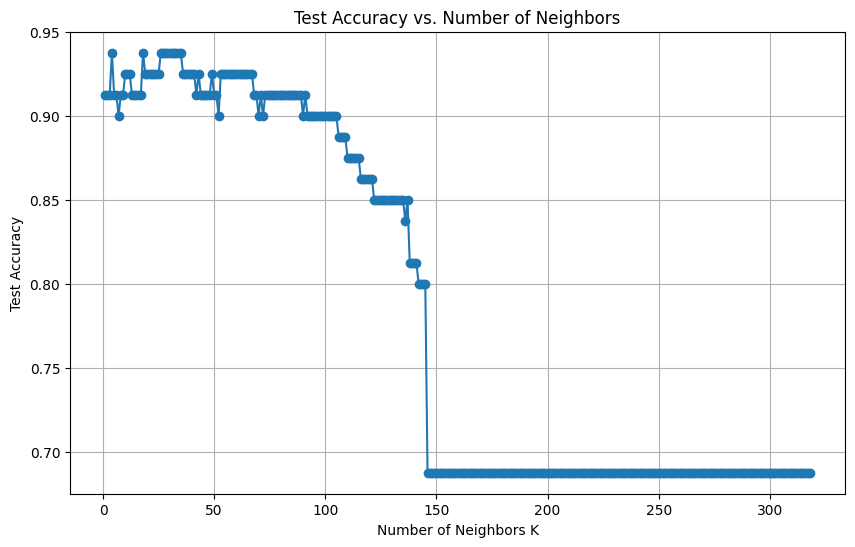

In [16]:
# ANSWER
# Split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the number of rows in the training data
n_train_rows = len(X_train)

# Initialize a list to store test accuracies
test_accuracies = []

# Loop through values of K from 1 to the number of rows in the training data
for k in range(1, n_train_rows + 1):
    # Create an instance of KNeighborsClassifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Predict the response values for the observations in X_test
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

# Plot test accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_train_rows + 1), test_accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()



### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py", 

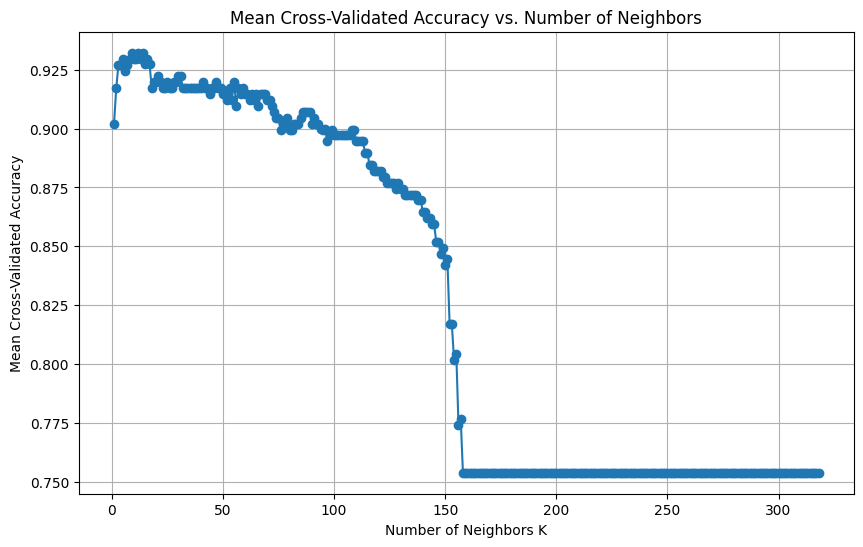

In [18]:
# ANSWER
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Get the number of rows in the data
n_rows = len(X)

# Initialize a list to store mean cross-validated accuracies
mean_cv_accuracies = []

# Loop through values of K from 1 to the number of rows in the data
for k in range(1, n_rows + 1):
    # Create an instance of KNeighborsClassifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    mean_cv_accuracies.append(cv_scores.mean())

# Plot mean cross-validated accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_rows + 1), mean_cv_accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Mean Cross-Validated Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [19]:
# ANSWER

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
# Standarize X

# Get the number of rows in the data
n_rows = len(X)

# Standardize the predictor matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store mean cross-validated accuracies
mean_cv_accuracies_unstandardized = []
mean_cv_accuracies_standardized = []

# Loop through values of K from 1 to the number of rows in the data
for k in range(1, n_rows + 1):
    # Create an instance of KNeighborsClassifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation on unstandardized data and calculate the mean accuracy
    cv_scores_unstandardized = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    mean_cv_accuracies_unstandardized.append(cv_scores_unstandardized.mean())
    
    # Perform 5-fold cross-validation on standardized data and calculate the mean accuracy
    cv_scores_standardized = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    mean_cv_accuracies_standardized.append(cv_scores_standardized.mean())



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_response.py", 

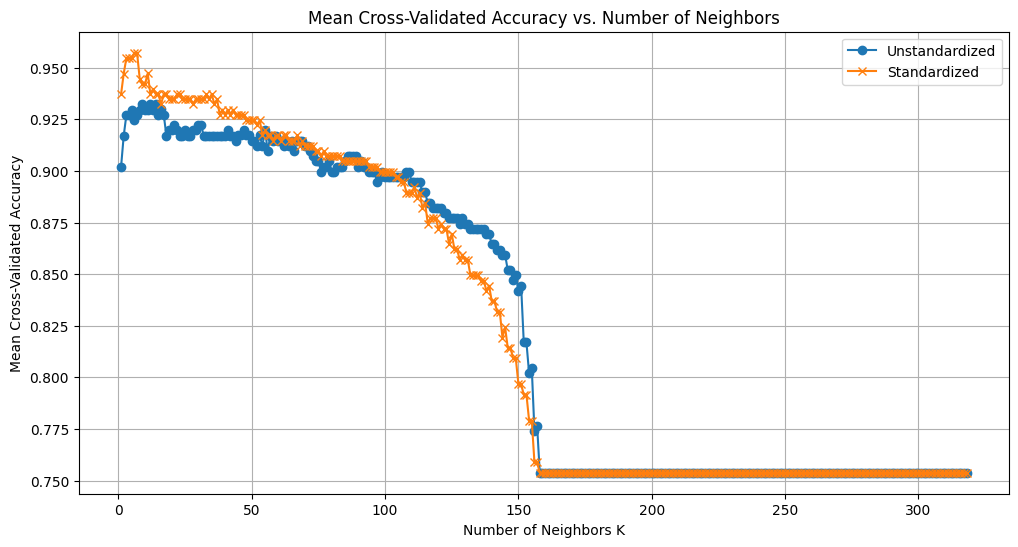

In [20]:
# ANSWER
# plot test accuracy by number of neighbors:

# Plot mean cross-validated accuracy vs. number of neighbors
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_rows + 1), mean_cv_accuracies_unstandardized, marker='o', linestyle='-', label='Unstandardized')
plt.plot(range(1, n_rows + 1), mean_cv_accuracies_standardized, marker='x', linestyle='-', label='Standardized')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Mean Cross-Validated Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



